<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/autorch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import joblib
col_names = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/phase2/dataset/col_names.pkl')
df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase2/dataset/train.csv',index_col=0)

In [85]:
!git clone https://github.com/skywalker0803r/autorch.git

Cloning into 'autorch'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 45 (delta 16), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [86]:
from autorch.utils import part

In [88]:
x_col = col_names['case'] + col_names['xna']
y_col = col_names['sle'] + col_names['shc'] + col_names['she']
normalize_idx = [[y_col.index(col_names['sle'][i]),y_col.index(col_names['shc'][i]),y_col.index(col_names['she'][i])]for i in range(len(col_names['xna']))]
normalize_idx

[[0, 54, 108],
 [1, 55, 109],
 [2, 56, 110],
 [3, 57, 111],
 [4, 58, 112],
 [5, 59, 113],
 [6, 60, 114],
 [7, 61, 115],
 [8, 62, 116],
 [9, 63, 117],
 [10, 64, 118],
 [11, 65, 119],
 [12, 66, 120],
 [13, 67, 121],
 [14, 68, 122],
 [15, 69, 123],
 [16, 70, 124],
 [17, 71, 125],
 [18, 72, 126],
 [19, 73, 127],
 [20, 74, 128],
 [21, 75, 129],
 [22, 76, 130],
 [23, 77, 131],
 [24, 78, 132],
 [25, 79, 133],
 [26, 80, 134],
 [27, 81, 135],
 [28, 82, 136],
 [29, 83, 137],
 [30, 84, 138],
 [31, 85, 139],
 [32, 86, 140],
 [33, 87, 141],
 [34, 88, 142],
 [35, 89, 143],
 [36, 90, 144],
 [37, 91, 145],
 [38, 92, 146],
 [39, 93, 147],
 [40, 94, 148],
 [41, 95, 149],
 [42, 96, 150],
 [43, 97, 151],
 [44, 98, 152],
 [45, 99, 153],
 [46, 100, 154],
 [47, 101, 155],
 [48, 102, 156],
 [49, 103, 157],
 [50, 104, 158],
 [51, 105, 159],
 [52, 106, 160],
 [53, 107, 161]]

In [99]:
import numpy as np
for i in range(54):
  assert np.allclose(df[y_col].iloc[:,normalize_idx[i]].sum(axis=1).mean(),1.0)

  0%|          | 1/300 [00:00<03:47,  1.32it/s]

epoch:0 train_loss:0.0130 valid_loss:0.0036


 17%|█▋        | 51/300 [00:53<04:26,  1.07s/it]

epoch:50 train_loss:0.0003 valid_loss:0.0003


 34%|███▎      | 101/300 [01:46<03:32,  1.07s/it]

epoch:100 train_loss:0.0002 valid_loss:0.0003


 50%|█████     | 151/300 [02:42<02:50,  1.14s/it]

epoch:150 train_loss:0.0002 valid_loss:0.0002


 67%|██████▋   | 201/300 [03:39<01:56,  1.18s/it]

epoch:200 train_loss:0.0001 valid_loss:0.0002


 84%|████████▎ | 251/300 [04:39<01:02,  1.27s/it]

epoch:250 train_loss:0.0001 valid_loss:0.0001


100%|██████████| 300/300 [05:46<00:00,  1.15s/it]


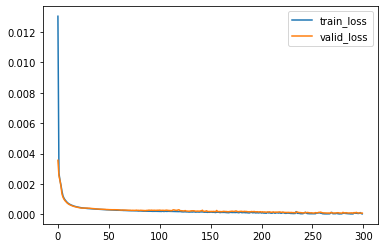

Sequential(
  (0): Linear(in_features=58, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=162, bias=True)
  (5): Sigmoid()
)

In [100]:
part1 = part.PartBulider(df,x_col,y_col,normalize_idx_list=normalize_idx)
part1.train()

In [101]:
part1.test()

,R2,MSE,MAPE
Individual Component to Light End Split Factor_Oxygen_Ratio,0,1.45811e-08,0.00702352
Individual Component to Light End Split Factor_Methane_Ratio,0,1.37765e-08,0.00648403
Individual Component to Light End Split Factor_Ethane_Ratio,0,1.42369e-08,0.00682351
Individual Component to Light End Split Factor_Propane_Ratio,0.994332,1.20274e-07,0.0195758
Individual Component to Light End Split Factor_n-Butane_Ratio,0.994019,6.16698e-07,0.0441907
...,...,...,...
Individual Component to Heavy End Split Factor_n-Pentylbenzene_Ratio,0.990764,3.55964e-05,0.576765
Individual Component to Heavy End Split Factor_n-Dodecane_Ratio,0.996221,3.37613e-05,inf
Individual Component to Heavy End Split Factor_n-Hexylbenzene_Ratio,0.993072,3.46773e-05,inf
Individual Component to Heavy End Split Factor_n-Tridecane_Ratio,0,1.45409e-08,0.0066588
